In [230]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt

In [234]:
grb = pd.DataFrame.from_csv('swift_grb.tsv', sep='\t')
grb.head()

,Time [UT],Trigger Number,BAT RA (J2000),BAT Dec (J2000),BAT 90% Error Radius [arcmin],BAT T90 [sec],BAT Fluence (15-150 keV) [10^-7 erg/cm^2],XRT RA (J2000),XRT Dec (J2000),XRT Time to First Observation [sec],XRT Early Flux (0.3-10 keV) [10^-11 erg/cm^2/s],UVOT RA (J2000),UVOT Dec (J2000),UVOT Time to First Observation [sec],UVOT Magnitude,Other Observatory Detections,Redshift,Host Galaxy,Comments,References
GRB,,,,,,,,,,,,,,,,,,,,
180205A,04:25:29.3,808625,126.819,11.536,1.1,15.5,10,08:27:16.72,11:32:31.6,n/a,95.0,08:27:16.74,11:32:30.9,182,V=16.11,"KAIT (0.76m), MPG (2.2m), VLT, Fermi (GBM), Sa...",1.409 (VLT: absorption),NaN,NaN,NaN
180204A,02:36:16,808483,330.123,30.852,1.1,1.16,4.8,22:00:31.98,30:50:16.2,87.17,n/a,n/a,n/a,92,V>19.0,"Fermi (GBM), Konus-Wind",NaN,NaN,UVOT: no detection,NaN
180115A,04:16:03,805318,12.040,-15.632,1.8,40.9,7.6,00:48:09.32,-15:37:50.5,131.07,35.7,00:48:09.27,-15:37:49.9,140,V=16.50,"NOT (2.5m), GTC (1.4m), Palomar (60"")",2.487 (GTC),NaN,NaN,NaN
180113A,02:47:06,804999,19.211,68.682,1.0,64,48,n/a,n/a,n/a,n/a,n/a,n/a,n/a,n/a,"Fermi (GBM), Konus-Wind, CALET (GBM), Astrosat...",NaN,NaN,"Due to an observing constraint, Swift will not...",NaN
180111A,16:42:06,804692,149.782,48.254,1.0,50.6,102,09:59:07.12,48:16:02.7,87.78,57.1,09:59:07.0,48:16:03.3,98,V>19.3,"AGILE, HJT (1.5m), TNT, AbAO (AS-32, 0.7m), CA...",NaN,NaN,NaN,NaN


In [235]:
grb = grb.rename(index=str, columns={"Time [UT]": "time", "Host Galaxy": "host_galaxy", 'Trigger Number': "t_no", 
                                     'BAT RA (J2000)': 'bat_ra', 'BAT Dec (J2000)': 'bat_dec',
                                     'BAT 90% Error Radius [arcmin]': 'bat_err_radius',
                                     'BAT Fluence (15-150 keV) [10^-7 erg/cm^2]': 'bat_fluence', 'XRT RA (J2000)': 'xray_ra',
                                     'XRT Dec (J2000)': 'xray_dec', 'XRT Time to First Observation [sec]': 'xray_tto',
                                     'XRT Early Flux (0.3-10 keV) [10^-11 erg/cm^2/s]': 'xray_flux',
                                     'UVOT RA (J2000)': 'uv_ra', 'UVOT Dec (J2000)': 'uv_dec',
                                     'UVOT Time to First Observation [sec]': 'uv_tto', 'UVOT Magnitude': 'uv_mag',
                                     'Other Observatory Detections' : 'other_observatories', 'Redshift': 'redshift',
                                     'Comments': 'comments'})
grb.count()

time                   1188
t_no                   1188
bat_ra                 1188
bat_dec                1188
bat_err_radius         1188
BAT T90 [sec]          1188
bat_fluence            1188
xray_ra                1188
xray_dec               1188
xray_tto               1188
xray_flux              1188
uv_ra                  1188
uv_dec                 1188
uv_tto                 1188
uv_mag                 1188
other_observatories     810
redshift                353
host_galaxy              91
comments                796
References                0
dtype: int64

In [238]:
grb = grb.dropna(subset = ['time'])

for i in range(len(grb.time)):
    grb.time[i] = str(grb.time[i]).split('.')[0]

/home/payal/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [241]:
pattern = '^\d\d:\d\d:\d\d$'

for i in range(len(grb.time)):
    if not (re.search(pattern, grb.time[i])):   
        grb.time[i] = "null"
        
grb = grb.replace("null", np.nan)
grb.dropna(subset = ['time'])

/home/payal/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,time,t_no,bat_ra,bat_dec,bat_err_radius,BAT T90 [sec],bat_fluence,xray_ra,xray_dec,xray_tto,xray_flux,uv_ra,uv_dec,uv_tto,uv_mag,other_observatories,redshift,host_galaxy,comments,References
GRB,,,,,,,,,,,,,,,,,,,,
180205A,04:25:29,808625,126.819,11.536,1.1,15.5,10,08:27:16.72,11:32:31.6,n/a,95.0,08:27:16.74,11:32:30.9,182,V=16.11,"KAIT (0.76m), MPG (2.2m), VLT, Fermi (GBM), Sa...",1.409 (VLT: absorption),NaN,NaN,NaN
180204A,02:36:16,808483,330.123,30.852,1.1,1.16,4.8,22:00:31.98,30:50:16.2,87.17,n/a,n/a,n/a,92,V>19.0,"Fermi (GBM), Konus-Wind",NaN,NaN,UVOT: no detection,NaN
180115A,04:16:03,805318,12.040,-15.632,1.8,40.9,7.6,00:48:09.32,-15:37:50.5,131.07,35.7,00:48:09.27,-15:37:49.9,140,V=16.50,"NOT (2.5m), GTC (1.4m), Palomar (60"")",2.487 (GTC),NaN,NaN,NaN
180113A,02:47:06,804999,19.211,68.682,1.0,64,48,n/a,n/a,n/a,n/a,n/a,n/a,n/a,n/a,"Fermi (GBM), Konus-Wind, CALET (GBM), Astrosat...",NaN,NaN,"Due to an observing constraint, Swift will not...",NaN
180111A,16:42:06,804692,149.782,48.254,1.0,50.6,102,09:59:07.12,48:16:02.7,87.78,57.1,09:59:07.0,48:16:03.3,98,V>19.3,"AGILE, HJT (1.5m), TNT, AbAO (AS-32, 0.7m), CA...",NaN,NaN,NaN,NaN
180103A,01:08:30,803066,159.585,-53.555,3,n/a,n/a,10:38:24.35,-53:33:21.6,344200,n/a,n/a,n/a,n/a,V>19.9,"AstroSat CZTI, Konus-Wind",NaN,NaN,"Due to the lack of onboard image detection, Sw...",NaN
180102A,15:49:44,802999,203.078,62.161,1.5,10.8,3.5,13:32:16.07,62:10:19.6,70.17,n/a,n/a,n/a,74,V>19.3,Fermi (GBM),NaN,NaN,UVOT: no detection,NaN
171222A,16:24:59,799669,148.273,35.624,1.7,174.8,19,09:53:06.64,35:37:35.9,169.70,669,n/a,n/a,176,V>19.2,"NOT, GTC (10.4m), MASTER-Net, Nanshan (1m), Fe...",2.409 (GTC: absorption),NaN,UVOT: no detection,NaN
171216A,03:06:59,797441,212.013,-50.500,2.1,30.0,4.8,14:07:57.77,-50:29:05.1,115.21,53.7,n/a,n/a,124,V>17.8,NaN,NaN,NaN,UVOT: no detection,NaN


In [242]:
grb.columns.values

array(['time', 't_no', 'bat_ra', 'bat_dec', 'bat_err_radius',
       'BAT T90 [sec]', 'bat_fluence', 'xray_ra', 'xray_dec', 'xray_tto',
       'xray_flux', 'uv_ra', 'uv_dec', 'uv_tto', 'uv_mag',
       'other_observatories', 'redshift', 'host_galaxy', 'comments',
       'References'], dtype=object)

## Distribution by time

In [243]:
grb['hour'] = pd.to_datetime(grb['time']).dt.hour

In [247]:
a = grb.groupby('hour').t_no.nunique().reset_index()

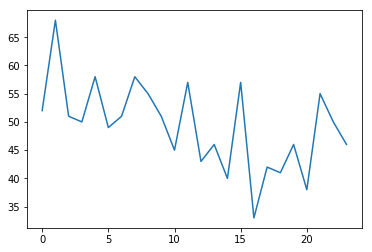

In [249]:
fig = plt.figure()

hour = a['hour'].tolist()
f = a['t_no'].tolist()

plt.plot(hour, f)

plt.show()

**Observation: ** Maximum number of detections are between 1 and 2 AM